# Data Description

## Background

AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.



## Context

This casestudy is about a bank where the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.



## Objectives

The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset.

This means:

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

- The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Universal Bank?

## Problem Statement:

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve,auc

In [122]:
from sklearn import preprocessing

col_names=df.columns
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

I have used numpy, pandas, matplotlib, seaborn, scipy for EDA and Data Visualization. Also used sklearn for data spliting, model building and for confusion matrix.

## Importing the Data Frame

In [3]:
data=pd.read_csv("Loan_Modelling.csv") #read the dataset

In [4]:
# copying data to another varaible to avoid any changes to original data
df=data.copy()

# Exploratory Data Analysis

### View the first and last 5 rows of the dataset

In [5]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### From the above data frame I can deduce the following:

- The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.
- Target Variable is Personal Loan which describe whether the person has taken loan or not. This is the variable which we need to predict.

Nonimal Varibles :

- ID - Customer ID
- ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

Ordinal Categorical variables :

- Family - Number of famlily member of the customer
- Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

Interval Variables :

- Age - Age of the customer
- Experience - Years of experience of customer has
- Income - Annula Income of the customer which is in dollars
- CCAvg - Avg. spending on credit cards per month which in dollars.
- Mortgage - Value of House Mortgage
- Binary Categorical Variable :

- CD Account - Does the customer have CD Account with bank or not?
- Security Account - Does the customer have Security Account with bank or not?
- Online - Does the customer have Online banking facility with bank or not?
- Credit Card - Does the customer have a credit card issued by Universal Bank or not?
- Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

### Shape of the dataset

In [7]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Also, we got 5000 rows which can be split into test & train datasets.

### Data type of each attribute

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 Here we can see that all the variables are numerical. But the columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variables which should be in 'category' type.

## Converting the data types 

- 'CD_Account', 'Online', 'Family', 'Education', 'CreditCard' and 'Securities_Account' are of int type, and we can change them to categories.

- converting "intger" to "category" reduces the data space required to store the dataframe

In [82]:
df["CD_Account"]= df["CD_Account"].astype("category")
df["Online"]= df["Online"].astype("category")
df["Family"]= df["Family"].astype("category")
df["Education"]= df["Education"].astype("category")
df["CreditCard"]= df["CreditCard"].astype("category")
df["Securities_Account"]= df["Securities_Account"].astype("category")

### Summary of the dataset

In [9]:
df.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Checking for missing values

In [10]:
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

Here total missing values and null count from each column is 0 and we can see there is no missing or null values in the dataframe.

### Checking for unique data

In [12]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

### Transposing Index and Columns

In [13]:
df.describe().T
#Check whether all rows x colums are loaded as given in question, all data must match before we start to even operate on it.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Observation:

- ID: seems just a identity representation of row or an item in a data frame, this can be dropped when processing model.

- Age: based on std, q1, q2, q3 seems valid values.

- Experience: Look at min, it say -3 experience cannot be in negative and this particular needs correction. Ideal values should be 0-80 considering a person started to work at 20 years and lives for max 100 years.

- ZipCode: All values seems fine. If we wish to discard region from the model still our model is not impacted if we drop this column. But at later stage we are predicting, people from which area are accepting more personal loans, then we may need to consider this field mandatorily.

- Family: Data looks ok and can play role like if children are less, then less responsibility and hence no need of loan, but more kids and then sometime people tend to go for extra loan apart from education as well. So this is very important field in model buulding.

- CreditCard: General human assumption i would do that, person who has creditcard is vrey unlikely to go for personal load. But if the need arises for a longer term some data points might be there who has credit card as well as personal loan.

Note!!

- Here we can see that minumum value of Experience column is -3.0 which could be a mistake because Experience can not be negative. So I will be fixing it in data cleaning and error fixing part.

- Binary varibales 'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account' has clean data.

- Ordinary Cat variables 'Familty' and 'Education' are also clean.

- Target variable also looks alright

### Trying to Fix the Negative Values in "Experience" column (Data Cleaning)

In [14]:
#we are going to get rid of the negative values in the "Experience" column and would replace it with the median

df[df['Experience'] == -1]['Experience'].count()

33

In [15]:
df[df['Experience'] == -2]['Experience'].count()

15

In [16]:
df[df['Experience'] == -3]['Experience'].count()

4

In [17]:
# Checking the negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

This means in total we have 52 negatives values present in "Experience" column

In [20]:
df['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
df['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
df['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [21]:
df['Experience'].isnull().sum()

52


So, 52 values in Experience is replaced by nan value.Now we will fill it with the median values.

In [106]:
df['Experience'].fillna(df['Experience'].median(),inplace=True)

In [107]:
# Total records of negative experience
df[df['Experience'] < 0]['Experience'].count()

0

Now we generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [23]:
#now we would look at the updated data description 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Pairplot which includes all the columns in the dataframe

The 'ID' column is irrelevant in the pairplot because its a column for record index

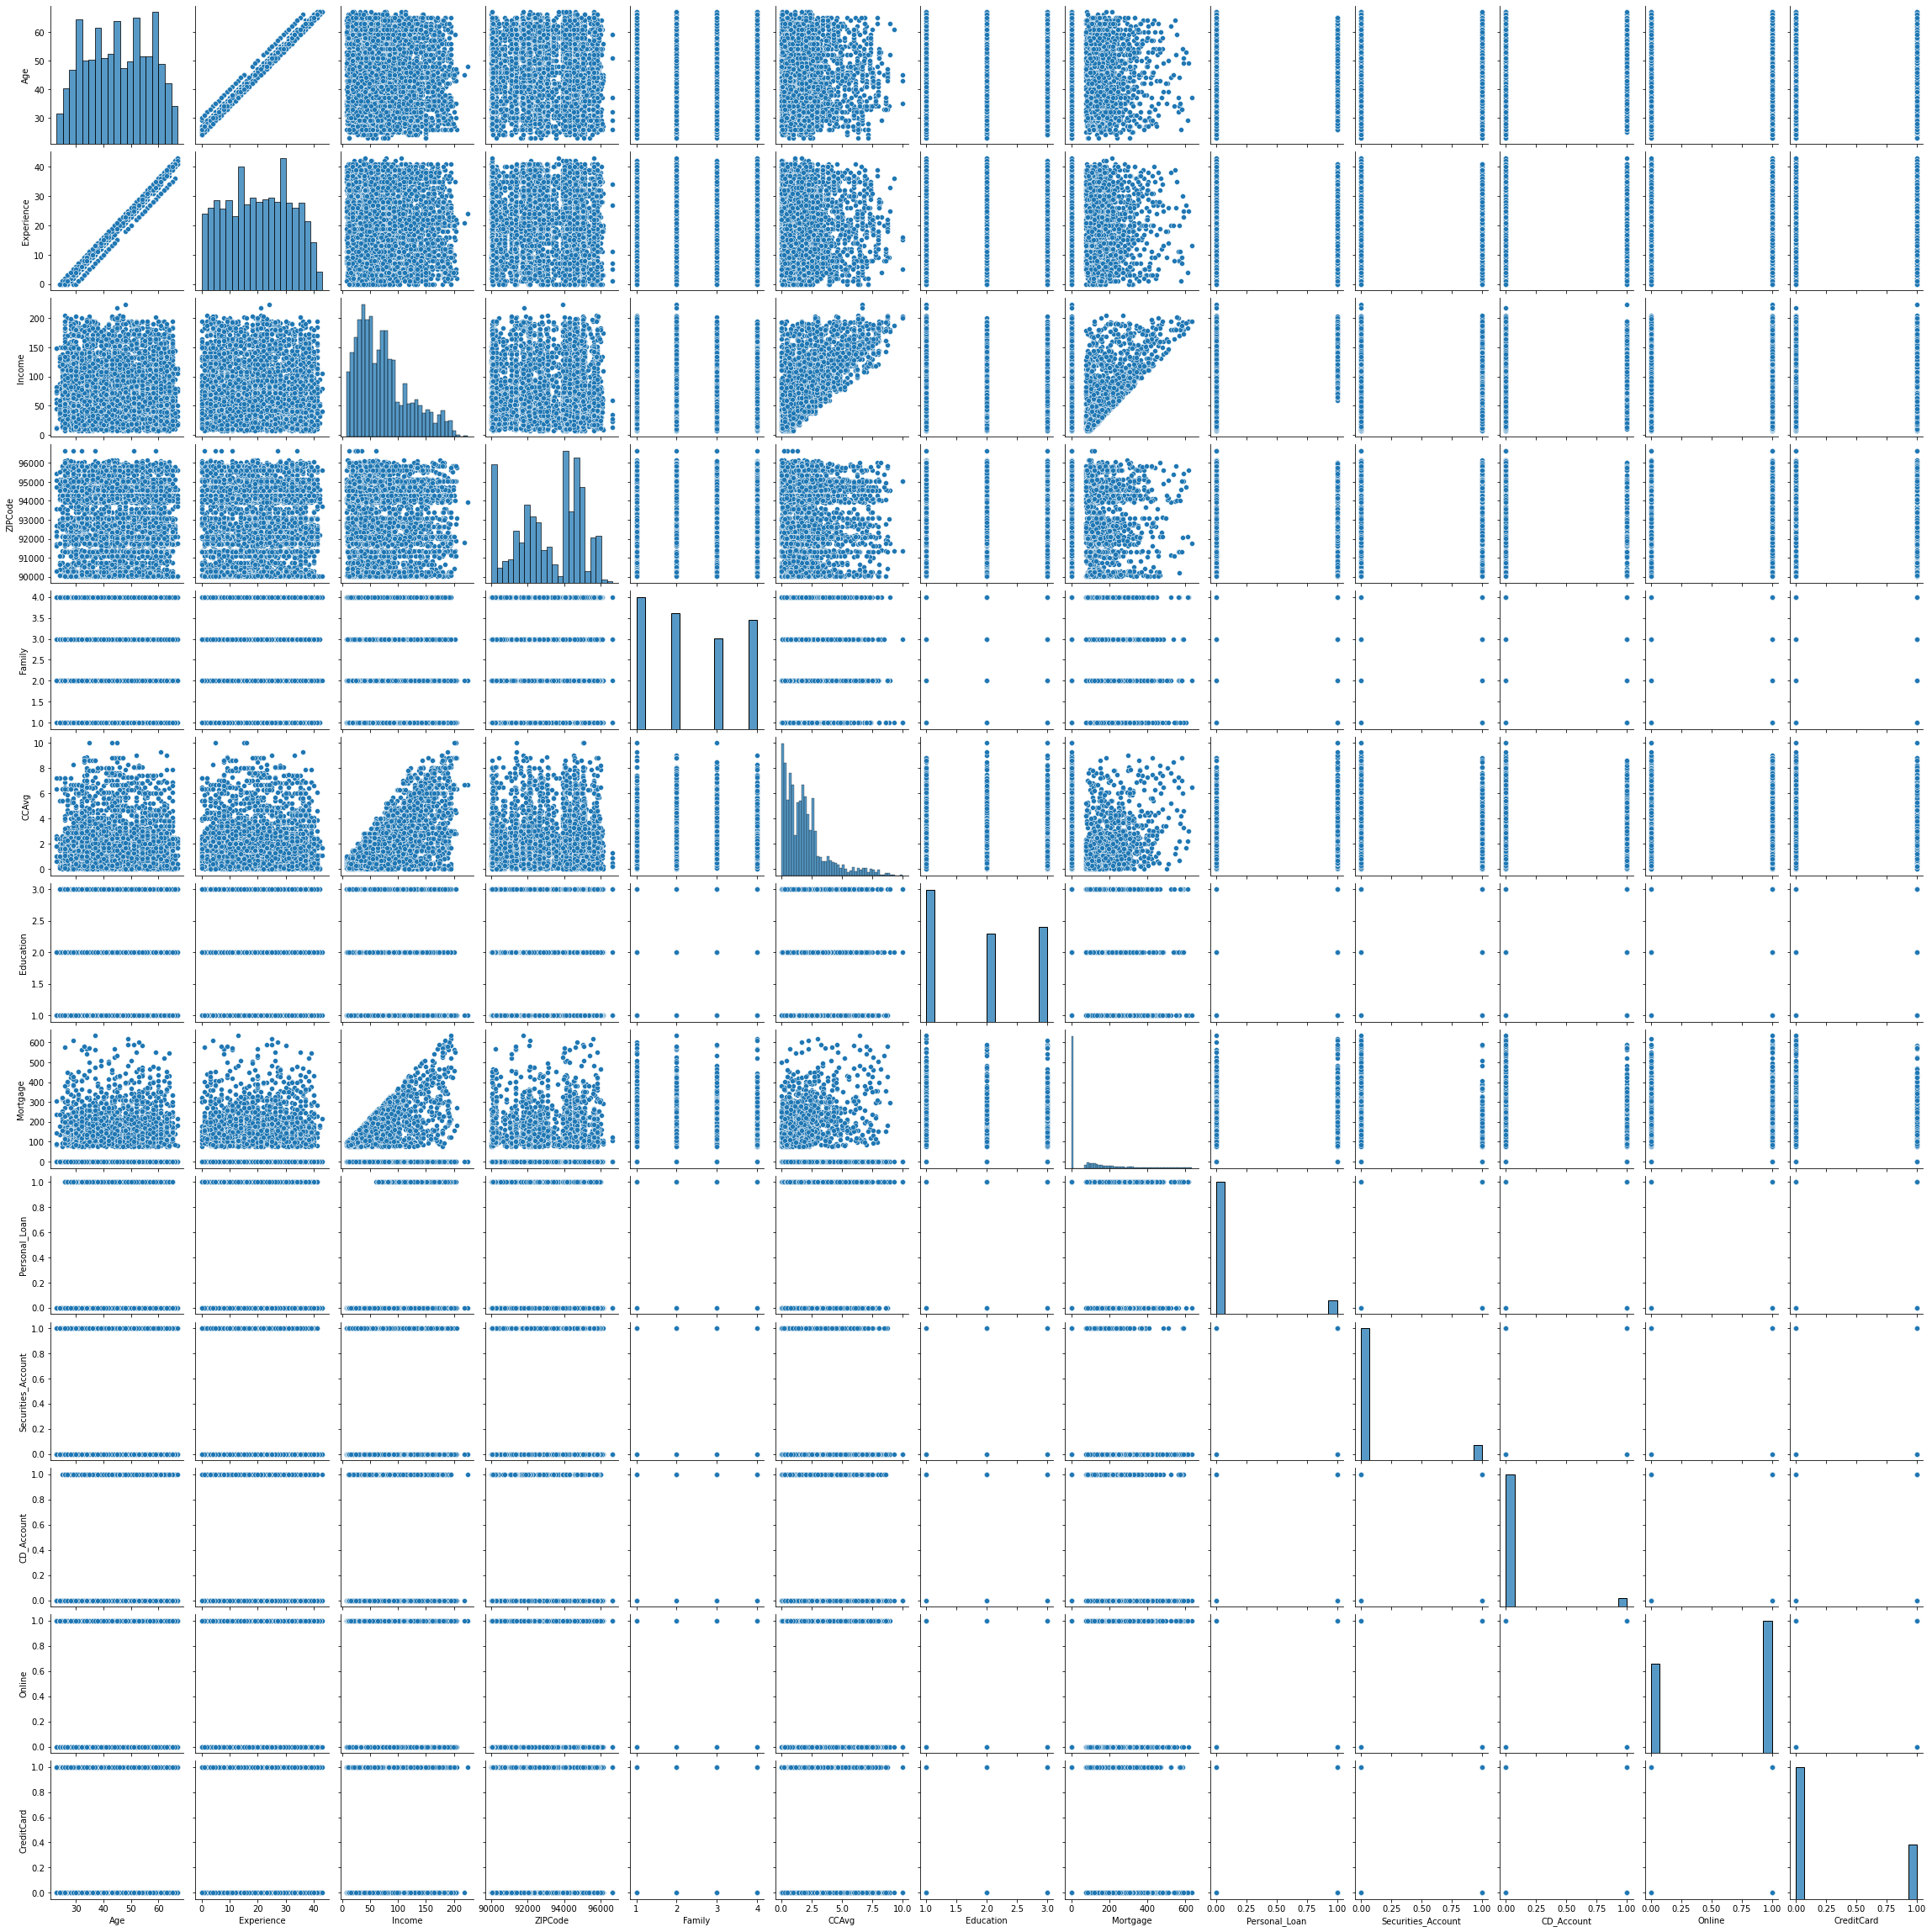

In [22]:
sns.pairplot(df.iloc[:,1:]) 

### Observations

From the above pair plot we can infer the association among the attributes and target column as follows:

- ID: This attribute can be dropped.Though the data distribution is normal.

- Age:Three small peaks can be indicating three values of age would be slightly more in number.However, the mean and median of the attribute is equal.The distribution is normal.  Most of the customers age is between 25 to 65 years.

- Eductaion : Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance.It also has low association with the 'Personal Loan'.

- Income : It is positively skewed and it will also have the outlier.Data for less income customers is more in the sample.

- ZIP Code: The attribute has sharp peaks telling the data from particular places are collected more.Spread is also less in the sample. More data from different places can be collected. Which means that 'Zip Code' does not really have any relationship with other variables.

- Family: It has 4 peaks(4 values) , families with least member is highest in the sample. It also has low association with the 'Personal Loan'.

- Mortage: This attribute is highly left skewed with a very high peak on the left telling us that most customer are having least mortage while a very few have some mortage. It  is also positively skewed. Majority of the individuals have a mortgage of less than 40K.

- Securities Account : This attributes tells us that majorly cutomers are not having Security account.

- CD account: Most of the customers dont have CDaccounts.

- Online: Higher number of customers use online banking in the sample.

- Credit Card: This attribute has less customers using CC in comparison to the CC users.

- The disribution of CCAvg is also a possotively skewed variable. Majority of the customers average monthly spending is between 1k to 9k.

### Checking the association of Experience with other quantitive variables 


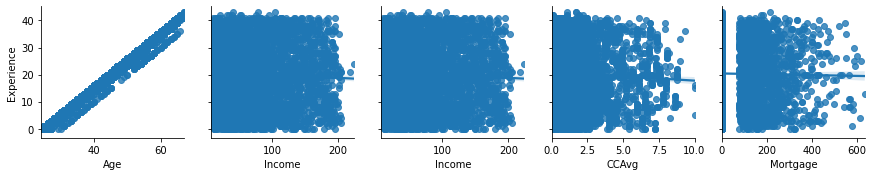

In [24]:
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(df, y_vars = 'Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)

From the above graphs it can be deduced that "Age" has a really strong and positive associaton with "Experience" column. We can also consider 'Education' to fix the negative experience error because the experience relates to education level.

### Relationship between the attributes:
Experience and age are in linear relationship. One can be dropped among them will not effect the accuracy.


In [25]:
df.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009406,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994101,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009406,0.994101,1.000000,-0.049245,-0.030525,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.017695,-0.055269,-0.049245,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030525,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.045610,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048939,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018243,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013459,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.014121,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


### Converting the negative values in "Experience" column to 0

The steps I would be following and how I can come up with the codes to convert the negative values to 0:

* I have to get the record of experience whose value is greater than 0

* I have to get the record of experience whose value is lesser than 0

* Get the list of Cutomer ID whose experience value is negative

* Get the list of 'Age' values where it finds negative values in 'Experience' column

* Get the list of 'Education' values where it finds negaitve values in 'Experience' column

* Next it filters the records matching the above conditions from the dataframe which has data with possive experience and takes the median and store in exp. There could be chance that there will be no possive experience which matches the above condtion. In such case it matches the above condiiton from the dataframe which has the record with negative experience and gets the median and store in exp.

* Next it will replace the negative experience with the median.

* After execution of below code we will check the negative experience again.

In [26]:
df_Possitive_Experience = df[df['Experience'] > 0]
df_Negative_Experience =  df[df['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education_values = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = df_Possitive_Experience[(df_Possitive_Experience['Age'] == age_values) & (df_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)

In [27]:
# this is to view the total of negative in experience
df[df['Experience'] < 0]['Experience'].count()

0

It shows that the negative value count has now become 0 which means there is no negative values anymore in the dataframe

Also, if we describe the 'Experienece' column to check the count, mean, standard deviation and the five point summary.

In [28]:
df.Experience.describe()

count    4948.000000
mean       20.331043
std        11.311973
min         0.000000
25%        10.750000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Observe: now you can see the min is 0.0 which was -3.0 before error fixing.

# Univariate Analysis

### ID

<AxesSubplot:xlabel='ID', ylabel='Density'>

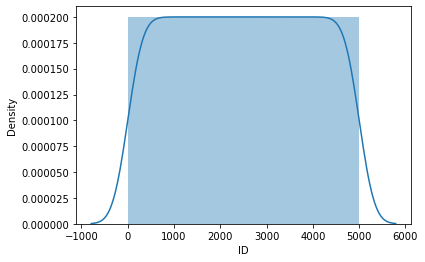

In [29]:
sns.distplot(df['ID'])

From the above graph it displays that 'ID' is unformly distributed.

### Age 

<AxesSubplot:xlabel='Age', ylabel='Count'>

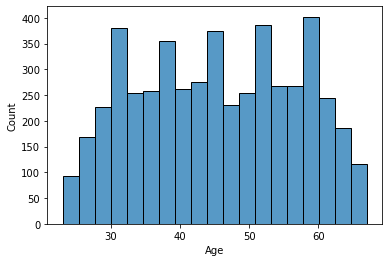

In [30]:
sns.histplot(df['Age'])


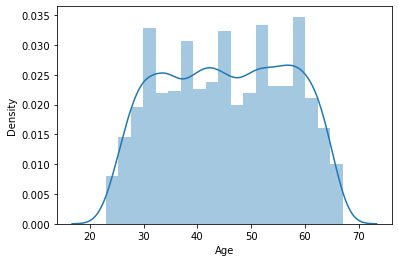

In [31]:
sns.distplot(df['Age'])
plt.show()

* This reveals that Age column is normally distributed

### Income

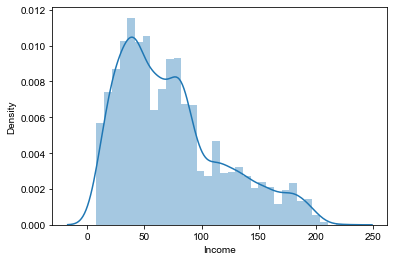

In [32]:
#graphical display of the distribution of the Income column 
sns.distplot(df['Income'])
sns.set_style('darkgrid')
plt.show()

Observation: The above distributionis is right skewed distribution because the tail goes to the right.

### Zip Code

<AxesSubplot:xlabel='ZIPCode', ylabel='Density'>

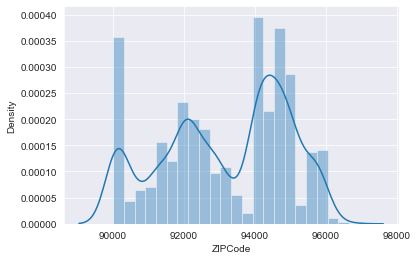

In [33]:
#graphical display of the distribution of the Zip Code column 
sns.distplot(df['ZIPCode'])

- The is uniformaly distrubuted. Data points are more with family size 1 and 2.

### CCAvg

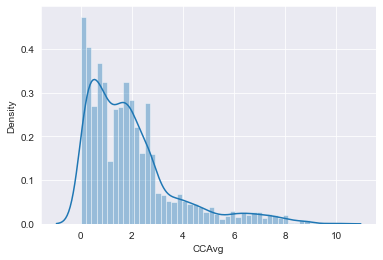

In [34]:
#graphical display of the distribution of the CCAvg column

sns.distplot(df['CCAvg'])
sns.set_style('darkgrid')
plt.show()

#### Observation:
It shows that the distribution is rightly skewed because the tails is at the right. This means that most of the customers' monthly average spending on credit cards is usually between 1k to 2.5k. However, there are few customers whereby their monthly average spending on credit card is >8k.

### Education

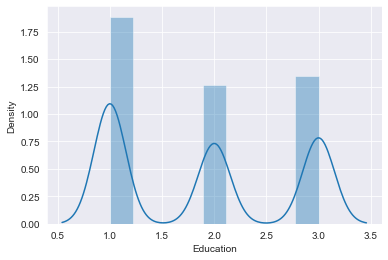

In [35]:
#graphical display of the distribution of the Education column
sns.distplot(df['Education'])
sns.set_style('darkgrid')
plt.show()

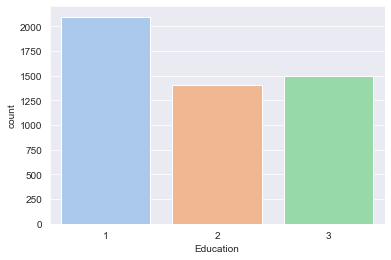

In [36]:
sns.countplot(df['Education'],palette='pastel')
plt.show()

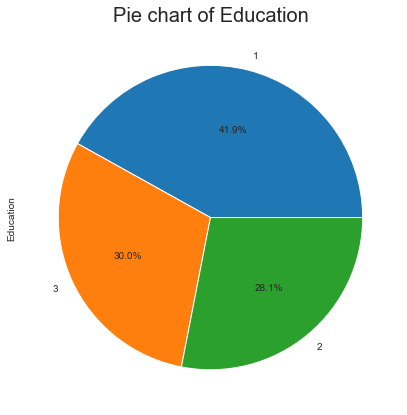

In [37]:
plt.figure(figsize=(9,7))
df.Education.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of Education', {'fontsize':20})
plt.show()

### Observation

- 1 stands for undergrad level customers, 2 stands for Graduate level customers and 3 stands for Advanced/Professionals level customers.
- The above graphs show that Undergrad level customers are more than the Graduate and Advanced/Professional customers.

### Mortgage

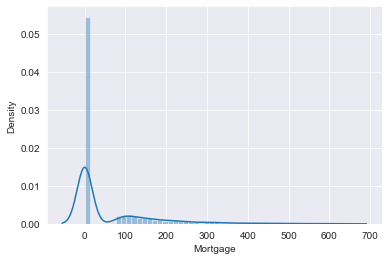

In [38]:
#graphical display of the distribution of the Mortgage column
sns.distplot(df['Mortgage'])
sns.set_style('darkgrid')
plt.show()

* The above distributionis is also right skewed distribution because the tail goes to the right. Most of the customers do not have mortgage. There are more customers whose mortgage amount is between 80000 to 150000 . Very few customers whos mortgage amount is more than $600000.

### Online

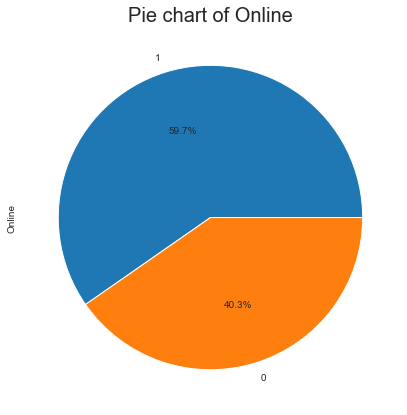

In [39]:
plt.figure(figsize=(9,7))
df.Online.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of Online', {'fontsize':20})
plt.show()

<AxesSubplot:xlabel='Online', ylabel='Density'>

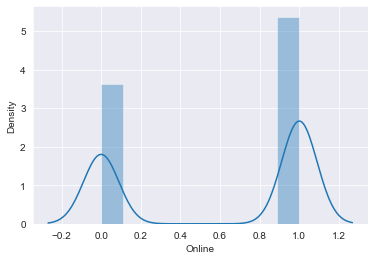

In [40]:
sns.distplot(df['Online'])

- This is a bit of an unusual distribution but I can deduce that the number of customers who own an Online account is greatwe than of those customers who do not own online accounts.

### Credit Card

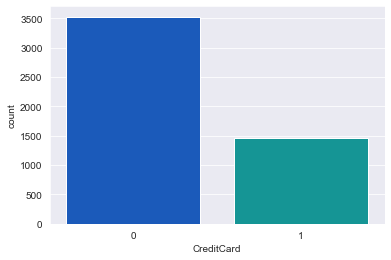

In [41]:
sns.countplot(df['CreditCard'],palette='winter')
plt.show()

<AxesSubplot:xlabel='CreditCard', ylabel='Density'>

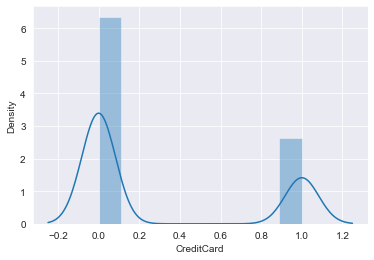

In [42]:
sns.distplot(df['CreditCard'])

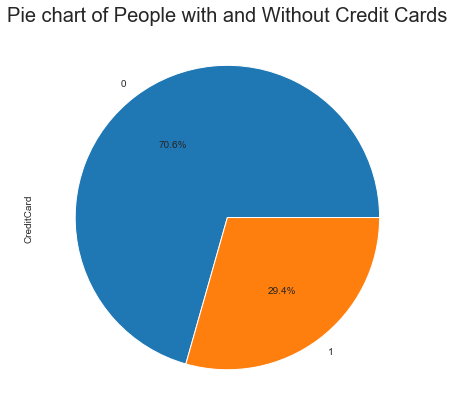

In [43]:
plt.figure(figsize=(9,7))
df.CreditCard.value_counts().plot.pie(autopct="%0.1f%%")
plt.title('Pie chart of People with and Without Credit Cards', {'fontsize':20})
plt.show()

- The number of customers without CreditCards way more than the number of customer with CreditCards

## Personal Loan

Since the dataset is talking about customers taking and legible for "Personal Loans". This means this column will be the target column for distribution and will mostly be associated with the other columns to provide more insights

In [44]:
loan_counts = pd.DataFrame(df["Personal_Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal_Loan"]
loan_counts

,Labels,Personal_Loan
0,0,4520
1,1,480


This reveals that out of 5000 data points:
- 4520 are being labelled as 0 and 480 are being labelled as 1.

This could mean that the percentage of customers who took the loan is significantlly greater than customers who did take the loan.

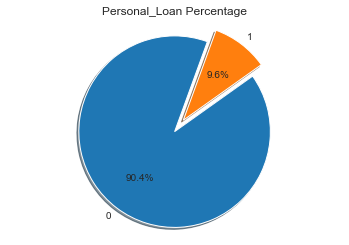

In [45]:
#I would also create a pie chart diaplaying the percentage of who took a loan and who did not for better insights

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal_Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal_Loan Percentage")
plt.show()

### Observation

From the pie chart it shows that the data is really biased (almost 1:10) in respect to the customers in category of not accepting personal loan. Therefore we could buil an assesment model which could perform better towards predicting which customers will either be accepting personal loans or not.
Hence, our goal should be to identify the customers who can accept personal loans based on the given features.

## General Observatintions from the univariate analysis

- The data set got 0 missing cells.
- It got 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
- It got 2 categorical variables: ‘Education’, ‘Family’
- It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
- Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.
- Also, Experience is highly correlated with Age (ρ = 0.994214857)
- 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
- Around 29% of the customer’s family size is 1.
- 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
- Around 60% of customers use internet banking facilities.
- Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
- Around 90% of the customer doesn’t have a securities account with the bank.
- The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
- The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
- The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
- The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)
- Also, no need for ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ is highly correlated with ‘Age’.

# Multivariate Analysis

We are going to see how the other features has an influnece on Personal Loan. 

Also here are some hypothesis which was generated earlier on : 
- high salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.
- More the number of earning family members, less probability of buying personal loans.
- Customers with probably the age of 30–50 will buy personal loans.
- The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

These hypothesis that was generated will be tested using the multivariate analysis with respect to the target variables

## Family vs Personal Loan

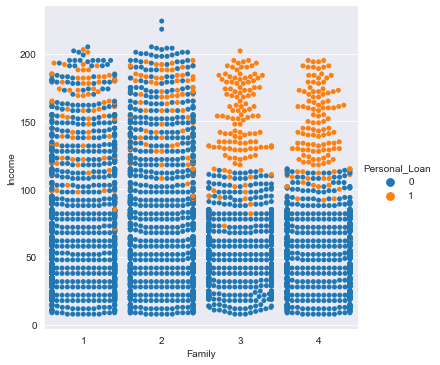

In [46]:
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = df, kind='swarm')

<AxesSubplot:xlabel='Family', ylabel='count'>

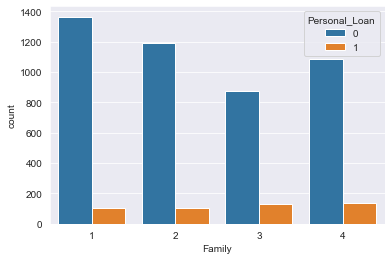

In [47]:
sns.countplot(x='Family',data=df,hue='Personal_Loan')

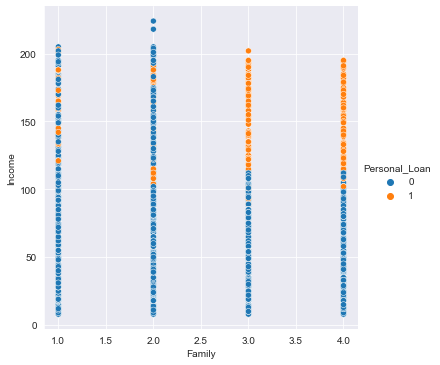

In [48]:
sns.relplot(x="Family", y="Income",hue="Personal_Loan", data=df)

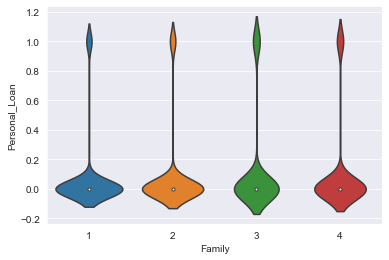

In [49]:
sns.violinplot(data=df, x='Family', y='Personal_Loan')
plt.show()

Cross tabulation can be given as:  /n Personal_Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
Cross tabulation in percentage can be given as:  /n Personal_Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


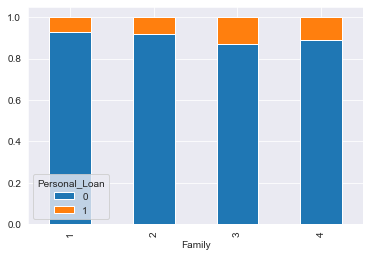

In [50]:
family=pd.crosstab(df['Family'],df['Personal_Loan'])
family.div(family.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross tabulation can be given as: ' , '/n',family)
print('Cross tabulation in percentage can be given as: ' , '/n',family.div(family.sum(1).astype(float),axis=0))

### Observations
-  Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.
-  Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.
- The number of family members not significantly affect probability. Hence it contradicts our hypothesis that the number of family members will affect the probability.


## Education



<AxesSubplot:xlabel='Education', ylabel='Income'>

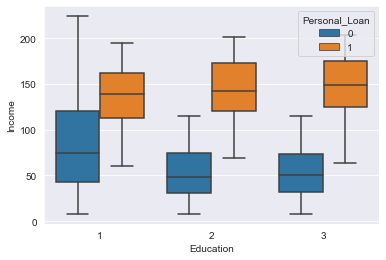

In [51]:
sns.boxplot(x='Education', y='Income', hue='Personal_Loan', data = df)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

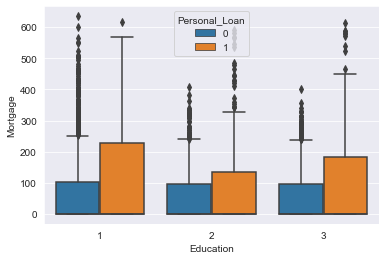

In [52]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=df)

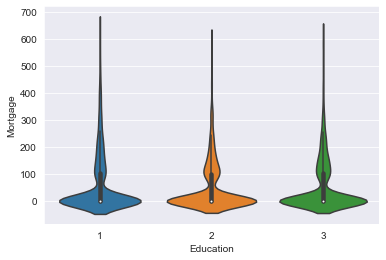

In [53]:
sns.violinplot(data=df, x='Education', y='Mortgage')
plt.show()

Cross tabulation can be given as:  
 Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
Cross tabulation in percentage can be given as:  
 Personal_Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


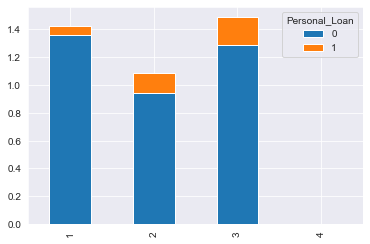

In [54]:
edu=pd.crosstab(df['Education'],df['Personal_Loan'])
edu.div(family.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross tabulation can be given as: ' , '\n',edu)
print('Cross tabulation in percentage can be given as: ' , '\n',edu.div(edu.sum(1).astype(float),axis=0))

### Observations:
- It displays that customers with undergraduate level of education and family greater than 3 are good customers who took loan. Customer who took loan have same income range irrespective of education level. Education of Graduate and above have more chance to take loan.
- It can be deduced that that customers whose education level is 1 and did not take loan has higher mortgage than customers who take loan of same education level. Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level.
- From the cross tabulation bar plot  we can infer that customers who are more educated have a higher probability of buying personal loans. Hence our hypothesis was true.

## CD_Account

<AxesSubplot:xlabel='CD_Account', ylabel='count'>

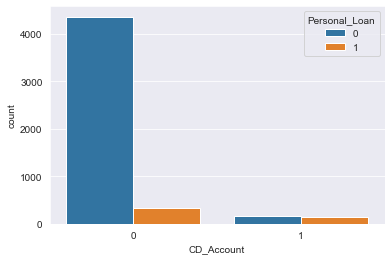

In [55]:
sns.countplot(x='CD_Account',data=df,hue='Personal_Loan')

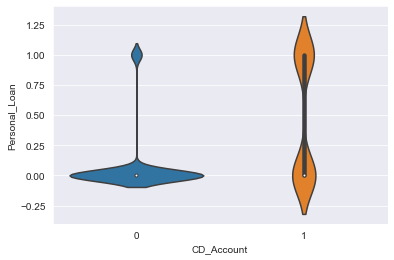

In [56]:
sns.violinplot(data=df, x='CD_Account', y='Personal_Loan')
plt.show()

### Observations:

- Customers who do not have CD account , do not have loan as well. This seems to be majority, but almost all customers who has CD account has loan as well.
- The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.

## Credit Card

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

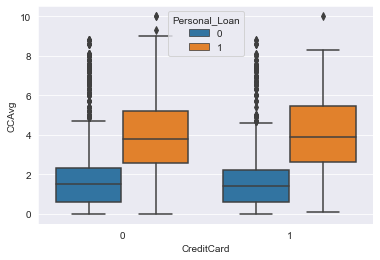

In [57]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal_Loan", data=df)

Cross tabulation can be given as:  
 Personal_Loan     0    1
CreditCard              
0              3193  337
1              1327  143
Cross tabulation in percentage can be given as:  
 Personal_Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


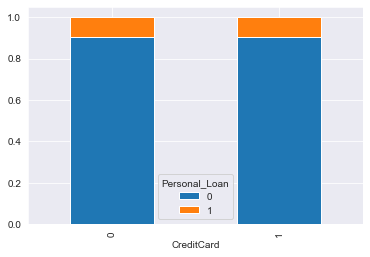

In [58]:
credit=pd.crosstab(df['CreditCard'],df['Personal_Loan'])
credit.div(credit.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross tabulation can be given as: ' , '\n',credit)
print('Cross tabulation in percentage can be given as: ' , '\n',credit.div(credit.sum(1).astype(float),axis=0))

### Observation

-  Customers who have credit card and monthly spending is higher are more likly to take loan.
- The customer who uses or doesn’t use a credit card issued by UniversalBank doesn’t seem to affect the probability of buying a personal loan.

## Securities_Account

<AxesSubplot:xlabel='Securities_Account', ylabel='count'>

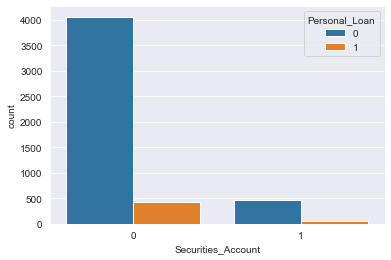

In [59]:
sns.countplot(x="Securities_Account", data=df,hue="Personal_Loan")

Cross tabulation can be given as:  
 Personal_Loan     0    1
CreditCard              
0              3193  337
1              1327  143
Cross tabulation in percentage can be given as:  
 Personal_Loan              0         1
Securities_Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


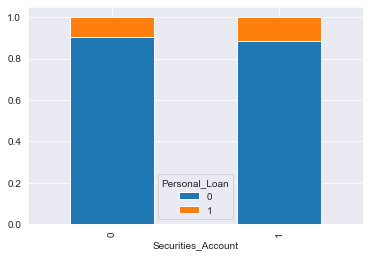

In [60]:
sec=pd.crosstab(df['Securities_Account'],df['Personal_Loan'])
sec.div(sec.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross tabulation can be given as: ' , '\n',credit)
print('Cross tabulation in percentage can be given as: ' , '\n',sec.div(sec.sum(1).astype(float),axis=0))

### Observation:
- Customers who has securies account are more likly to take loan
- Majority of customers who does not have loan do not have securities account.
- The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.


## Online

<AxesSubplot:xlabel='Online', ylabel='count'>

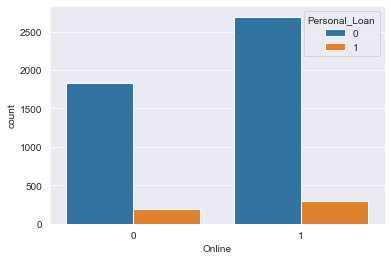

In [61]:
sns.countplot(x="Online", data=df,hue="Personal_Loan")

Cross tabulation can be given as:  
 Personal_Loan     0    1
Online                  
0              1827  189
1              2693  291
Cross tabulation in percentage can be given as:  
 Personal_Loan         0         1
Online                           
0              0.407995  0.042206
1              5.159004  0.557471


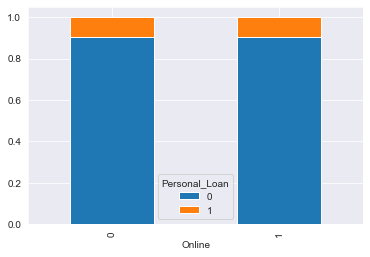

In [62]:
online=pd.crosstab(df['Online'],df['Personal_Loan'])
online.div(online.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross tabulation can be given as: ' , '\n',online)
print('Cross tabulation in percentage can be given as: ' , '\n',online.div(sec.sum(1).astype(float),axis=0))

- The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.


## Numerical Variables Vs Target Variable


The Numerical variables (‘Age’, ‘CC_Avg’ ‘Income’, ‘Mortgage’, ‘Experience’) vs Target variable (‘Personal_Loan’). Then we will find the mean of the numeric independent variable for which the customers that buy the personal loan vs the mean of the numeric variables of the customers who do not.

- Now we are going to use the groupby function which will involve the combination of splitting the object and by using this function will produce combined results and this will help me and make my work easier because it is a large amount of data.

## Age vs Personal Loan

<AxesSubplot:xlabel='Personal_Loan'>

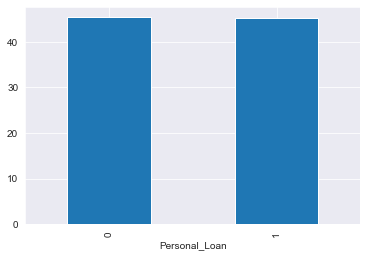

In [63]:
df.groupby('Personal_Loan')['Age'].mean().plot(kind='bar')

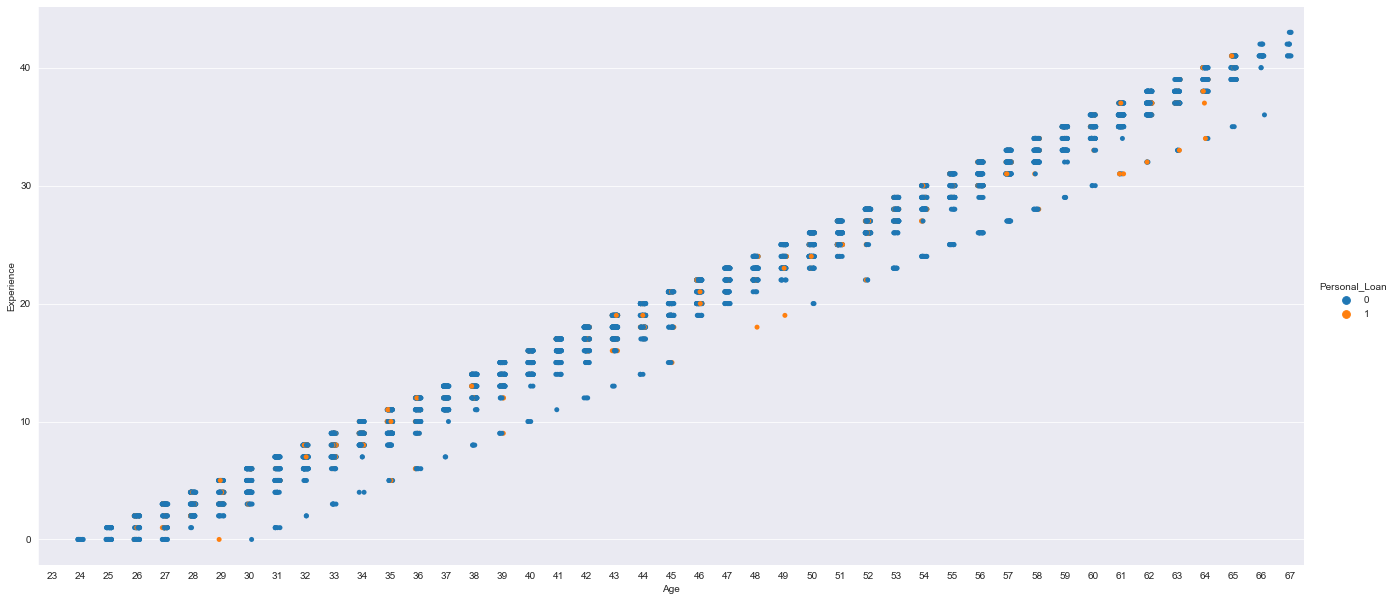

In [64]:
sns.catplot(x='Age', y='Experience', hue='Personal_Loan', data = df, height=8.27, aspect=11/5)

<AxesSubplot:xlabel='Age_bin'>

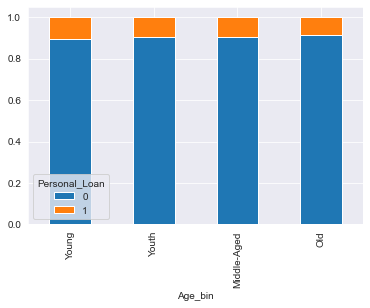

In [65]:
#creating bins to have more insights and converting numeric into categorical variables 

bins=[20,30,40,50,60]
group=['Young','Youth','Middle-Aged','Old']
df['Age_bin']=pd.cut(df['Age'],bins,labels=group)#this code would convert this column to categorical variable
age=pd.crosstab(df['Age_bin'],df['Personal_Loan'])
age.div(age.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

### Observation:

- From the first graph, it shows the y-axis displays the mean of age. However, there is not much change in the mean of age. Which is why I decided to create bins for the customers to have a clearer view and to make analysis for the loan status for each age bin.
- From the second graph it displays Age and Experience have a strong correlation. This could mean as Age increases, Experience will also increases.
- It could be deduced that the Age of the customer applying for a Personal Loan will not affect the chances of acquiring a Personal Loan which counters the hypothesis which we assumed that the Age of people applying for Personal Loan is a major factor while actually buying a Loan.

## CCAvg vs Personal Loan

Now we are going to check the Personal Loan buyers average spent on their credit cars monthly. We would also use the groupby function here

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

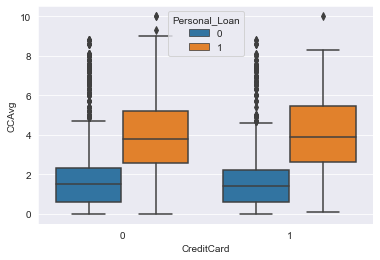

In [66]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal_Loan", data=df)

- This shows that customers who have credit cards and monthly spending which are high are more likley to get a loan.

<AxesSubplot:xlabel='Personal_Loan'>

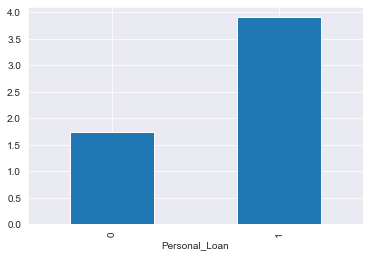

In [67]:
df.groupby('Personal_Loan')['CCAvg'].mean().plot(kind='bar')

Again, here the y-axis represents the mean of customers spending on their credit cars monthly. This reveals just as the same inference as above which is the customers who have credit cards and monthly spending which are high are more likley to get a loan.


Text(0.5, 1.0, 'CCAvg Distribution')

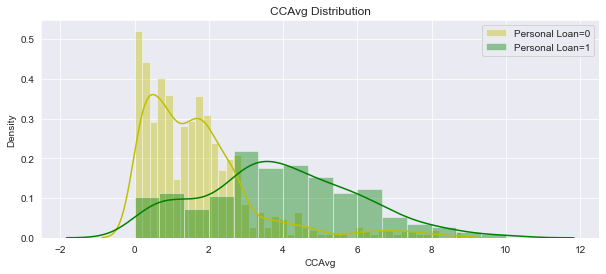

In [68]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal_Loan"] == 0]['CCAvg'], color = 'y',label='Personal Loan=0')
sns.distplot(df[df["Personal_Loan"] == 1]['CCAvg'], color = 'g',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

This shows that customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

In [69]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal_Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal_Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


- Shows that customers who have taken Personal Loans have a high Credit Card Average
- Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan
- Lower credit card spending with a median of 1400 dollars is less likely to take a loan.

## Income

Now we will check how the Income of a Customer affect the possibility of how liable the customer is.

<AxesSubplot:xlabel='Personal_Loan'>

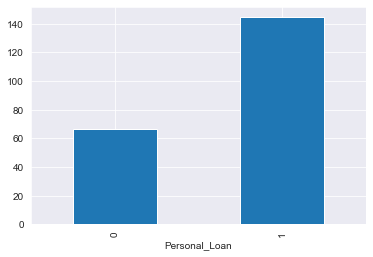

In [70]:
df.groupby('Personal_Loan')['Income'].mean().plot(kind='bar')

- The graph reveals that the customera with high Income are more likely to buy the personal loan which counters the hypothesis that states high salaries are less likely to buy Personal Loans while customers with medium to low salaries are more likely for buying Personal Loans

Text(0.5, 1.0, 'Income Distribution')

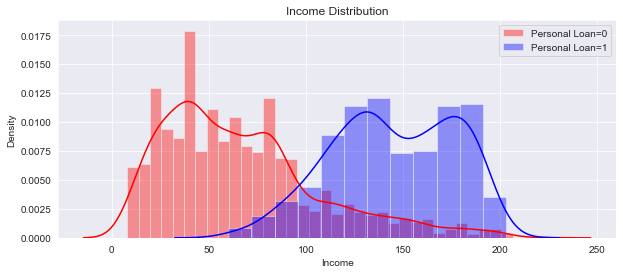

In [71]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal_Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal_Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

* This still just proves the point made in the graph above clearer which is customers who have taken personal loan have income than those who did not take. So high income seems to be good predictor of whether or not a customer will take a personal loan.

# Outlier Detection and Treatment

<AxesSubplot:>

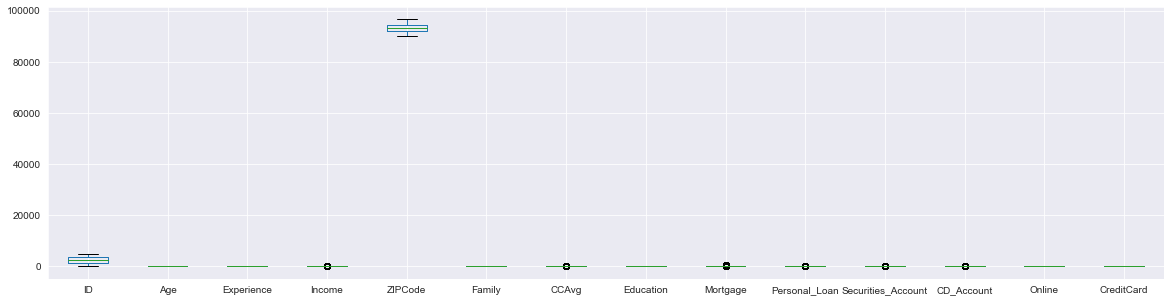

In [72]:
df.boxplot(return_type='axes', figsize=(20,5))

* The boxplot shows that there are outliers on a few columns
* shows that Mortgage has the most number of outliesrs
* while other columns such as . Income and CCAvg also have outliers and can be repaured by scaling the attributes

## Correlation using Heatmap

<AxesSubplot:title={'center':'Correlation of Attributes'}>

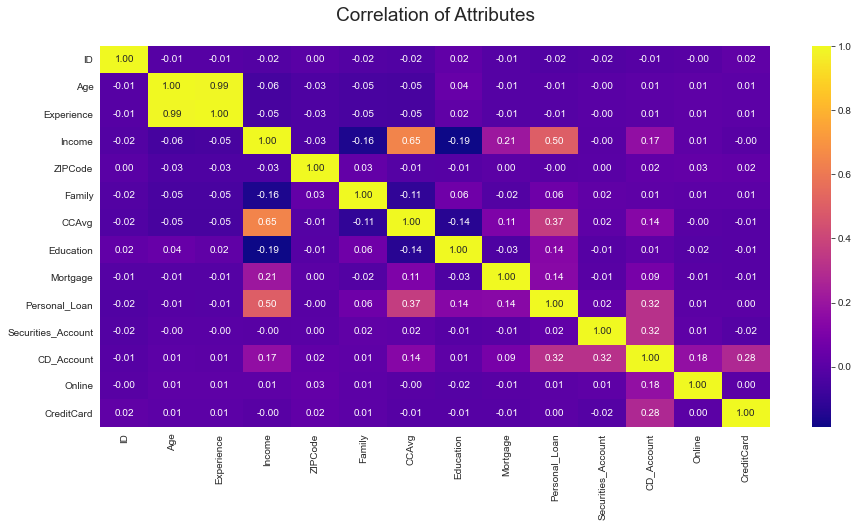

In [73]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

### Observation from the Heatmap:

* Age and Experience are highly correlated and the correlation is almost 1.
* 'Income' and 'CCAvg' is moderately correlated.
* Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
* It can be deduce in above heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
* 'Mortgage' has moderate correlation with 'Income' which is about 12%.
* 'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

In [74]:
df.isnull().sum()
#just checking again for any missing values

ID                      0
Age                     0
Experience             52
Income                  0
ZIPCode                 0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal_Loan           0
Securities_Account      0
CD_Account              0
Online                  0
CreditCard              0
Age_bin               547
dtype: int64

* there are really no missing value and ignore age bin it was just to help understand the dataset easier.
* Now lets begin with the outlier treatment
* From the univariate analysis it showed that mortgage indeed had outliers, therefore, we are going to treat the presence of outliers before it would affecr the the distribution of our data further.

In [75]:
#in order to remove the outliers we would perform a z-score to remove the skewness

df['Mortgage_zscore']=np.abs(stats.zscore(df['Mortgage']))
df=df[df['Mortgage_zscore']<3]
df.drop('Mortgage_zscore',axis=1,inplace=True)
#I picked that the rows with z_score less <3. Therefore we would drop the rows which contain outliers and start model building

In [76]:
df.shape

(4895, 15)

After I had removed the outliers the dataset dropped 100+ rows which contained outliers and now my model is ready to be built!

# Target Distribution

Before we begin with the model building, I want to recall the target variable which would be used to create insights.

In [77]:
df["Personal_Loan"].value_counts()

0    4462
1     433
Name: Personal_Loan, dtype: int64

<AxesSubplot:xlabel='Personal_Loan', ylabel='count'>

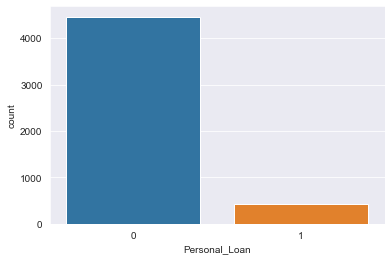

In [78]:
sns.countplot(df["Personal_Loan"])

In [79]:
#checking the distribution between various attribute in relation to the target variable

df.groupby(df['Personal_Loan']).mean()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,2515.099283,45.379202,20.394785,65.151502,93173.309054,2.382788,1.709283,1.853429,46.787539,0.102420,0.036082,0.595921,0.295159
1,2364.030023,44.965358,19.752887,142.692841,93150.785219,2.595843,3.867252,2.237875,60.695150,0.124711,0.279446,0.602771,0.290993


Observation
- The average Income of customers who took loan is more than double of the avg income of customers who didn’t take loan last year.
- The average mortage for loan availing customers is approximately double for the not availing customers.


## Dropping columns

#### From above it shows us that 'ID' and "ZIP Code' are irrelevant for our model building so we will drop it.

#### Age and Experience are also highly correlated so we can build our model from either

In [81]:
df.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0


In [80]:
df = df.drop(['ID','ZIPCode','Age_bin'], axis=1)

# Model Building

It is easier to deduce insights from the "AGE" column from the multivariate analysis so it does not give interesting insights and also the age bins would be a lot of analysis to compare with which would not aid in quick results and Age might be be correlated finely with the target variable. However, it may not correlate so good with other variables in the dataset.

I have chosen to use experience because it is preferrably easier for me because it is categorised into TWO that is:

* Customers taking Personal Loan with Experience
* Customers taking Personal Loan without Experience



In [109]:
dfe=df.copy()

#creating another copy to not confuse myself if I want to create 

In [110]:
dfe.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0


## Creating two new dataframes for the model building which are 'With Eperience' and 'Without Experience' mutually

In [111]:
ploan_with_experience = df #same dataset which was initially created
ploan_without_experience = df.drop(['Experience'], axis=1) #the dataset however without the experience column

In [112]:
print('Columns With Experience : ', ploan_with_experience.columns)
print('Columns Without Experience : ', ploan_without_experience.columns)

Columns With Experience :  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')
Columns Without Experience :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')


## Seperating the Target Variable from the Independent Variables from the Two new dataframes

In [113]:
# From Exprenece Dataframe:
X_Expr = ploan_with_experience.drop('Personal_Loan', axis=1)
Y_Expr = ploan_with_experience[['Personal_Loan']]

In [114]:
# From Without Exprenece Dataframe:
X_Without_Expr = ploan_without_experience.drop('Personal_Loan', axis=1)
Y_Without_Expr = ploan_without_experience[['Personal_Loan']]

## Spliting the data into training and test set in the ratio of 70:30 respectively

In [115]:
# From Experience Dataframe:
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(X_Expr, Y_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('x test data  {}'.format(X_Expr_test.shape))
print('y test data  {}'.format(y_Expr_test.shape))

x train data (3426, 11)
y train data (3426, 1)
x test data  (1469, 11)
y test data  (1469, 1)


In [116]:
# From Without Experience Dataframe:
X_train, X_test, y_train, y_test = train_test_split(X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3426, 10)
y train data (3426, 1)
x test data  (1469, 10)
y test data  (1469, 1)


# Logistic Regression


### Using the Experience Column

In [117]:
#X_Exp_train, X_Exp_test, y_Exp_train, y_Exp_test
logreg_expr_model = LogisticRegression()
logreg_expr_model.fit(X_Expr_train, y_Expr_train)
print(logreg_expr_model , '\n')

# Predicting for test set
logreg_expr_y_predicted = logreg_expr_model.predict(X_Expr_test)
logreg_expr_score = logreg_expr_model.score(X_Expr_test, y_Expr_test)
logreg_expr_accuracy = accuracy_score(y_Expr_test, logreg_expr_y_predicted)

logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, logreg_expr_y_predicted)

LogisticRegression() 



## Using Without Experience Column

In [118]:
#X_train, X_test, y_train, y_test
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

####  Below is the comparison b/w Logistic Regression Model Accuracy and Confussion Matrix With 'Experience' and Without 'Experience'.

In [119]:
# Accuracy
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % logreg_accuracy)
print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_expr_accuracy)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)
print('\nTrue Possitive    = ', logestic_confusion_matrix[1][1])
print('True Negative     = ',   logestic_confusion_matrix[0][0])
print('False Possive     = ',   logestic_confusion_matrix[0][1])
print('False Negative    = ',   logestic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)
print('\nTrue Possitive    = ', logestic_confusion_matrix_expr[1][1])
print('True Negative     = ',   logestic_confusion_matrix_expr[0][0])
print('False Possive     = ',   logestic_confusion_matrix_expr[0][1])
print('False Negative    = ',   logestic_confusion_matrix_expr[1][0])

Logistic Regression Model Accuracy Score W/O Experience  : 0.946903
Logistic Regression Model Accuracy Score With Experience : 0.948264

Logistic Regression Confusion Matrix W/O Experience: 
 [[1323   18]
 [  60   68]]

True Possitive    =  68
True Negative     =  1323
False Possive     =  18
False Negative    =  60

Logistic Regression Confusion Matrix With Experience: 
 [[1325   16]
 [  60   68]]

True Possitive    =  68
True Negative     =  1325
False Possive     =  16
False Negative    =  60


#### Observations

- The above accurracy results that show that the accuracy is higher With Experience which is 94.82% than Without Experience which was 94.69%
- We can also see from the confusion matrix that the prediction of customers who do not have accept loan and the customers who accept loan is better With Experience
###  False Positive and False Negative errors is less With Experience
- Therefore, we could improve the accurracy by scalling the attributes
- I will not be considering the second DataFrame which is "Without Experience" for further iteration

## Improvement of the model

### Iteration 2 For Logistic Regression with Experience

In [121]:

#X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)

In [123]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Expr_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)

In [124]:
print('----------------------Final Analysis of Logistic Regression----------------------------\n')
print('After Scalling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scalling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

----------------------Final Analysis of Logistic Regression----------------------------

After Scalling Logistic Regression Model Accuracy Score with Experience: 0.952349

After Scalling Logistic Regression Confusion Matrix With Experience: 
 [[1323   18]
 [  52   76]]

True Possitive    =  76
True Negative     =  1323
False Possive     =  18
False Negative    =  52


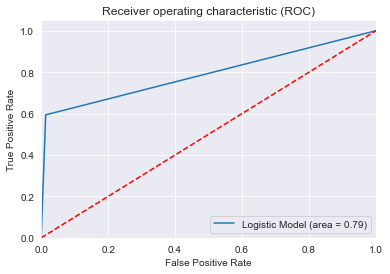

In [126]:
logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

In [98]:
#dfe.drop('Experience',axis=1,inplace=True)

In [127]:
#dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4895 non-null   int64   
 1   Experience          4895 non-null   float64 
 2   Income              4895 non-null   int64   
 3   Family              4895 non-null   category
 4   CCAvg               4895 non-null   float64 
 5   Education           4895 non-null   category
 6   Mortgage            4895 non-null   int64   
 7   Personal_Loan       4895 non-null   int64   
 8   Securities_Account  4895 non-null   category
 9   CD_Account          4895 non-null   category
 10  Online              4895 non-null   category
 11  CreditCard          4895 non-null   category
dtypes: category(6), float64(2), int64(4)
memory usage: 457.0 KB


In [108]:
#dfe.isnull().any()

Age                   False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

In [128]:
#X=dfe.drop('Personal_Loan',axis=1)   #set of independent variables
#y=dfe['Personal_Loan']  #set of dependent variables

#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1) #splitting of the data

In [129]:
#LogReg_model=LogisticRegression()
#LogReg_model.fit(X_train,y_train)   #trying to fit the model into training dataset

LogisticRegression()

In [217]:
y_pred=LogReg_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       893
           1       0.62      0.40      0.48        86

    accuracy                           0.93       979
   macro avg       0.78      0.69      0.72       979
weighted avg       0.92      0.93      0.92       979

0.9254341164453525


TypeError: 'numpy.ndarray' object is not callable

In [136]:
LogReg_prob=LogReg_model.predict_proba(X_test)
fpr2,tpr2,thresholds2=roc_curve(y_test,LogReg_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.944929


In [139]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1093   24]
 [  48   59]]


In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1117
           1       0.71      0.55      0.62       107

    accuracy                           0.94      1224
   macro avg       0.83      0.76      0.79      1224
weighted avg       0.94      0.94      0.94      1224



## Observation:

The dataset shows that  74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.

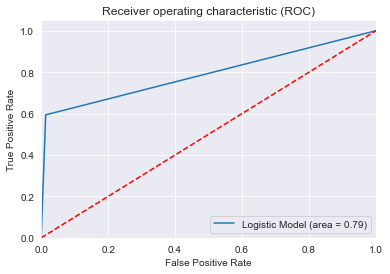

In [142]:
logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

In [145]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.9411764705882353


## Logistic Results
- Accuracy of logistic regression classifier on test set: 89.93%
- Misclassification Rate: It is often wrong: 10.07%
- Sensitivity: When its actually yes how often it predicts yes: 90.32%
- Specificity: When its actually no, how often does it predict no: 41.67%
- Precision: When it predicts yes, how often is it correct: 99.48%

# Decision Trees

### Build Decision Tree Model
We will build our model using the DecisionTreeClassifier function. Using default 'gini' and entropy criteria to split.

In [149]:
y.value_counts()

0    4462
1     433
Name: Personal_Loan, dtype: int64

In [151]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Scoring our Decision Tree

In [152]:
# accuracy on training set
print("Accuracy on train set", model.score(X_train,y_train))

# accuracy on test set
print("Accuracy on test set", model.score(X_test,y_test))

Accuracy on train set 1.0
Accuracy on test set 0.9795751633986928


In [153]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [154]:
# accuracy on training set
print("Accuracy on train set", model.score(X_train,y_train))

# accuracy on test set
print("Accuracy on test set", model.score(X_test,y_test))

Accuracy on train set 1.0
Accuracy on test set 0.9828431372549019


In [155]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

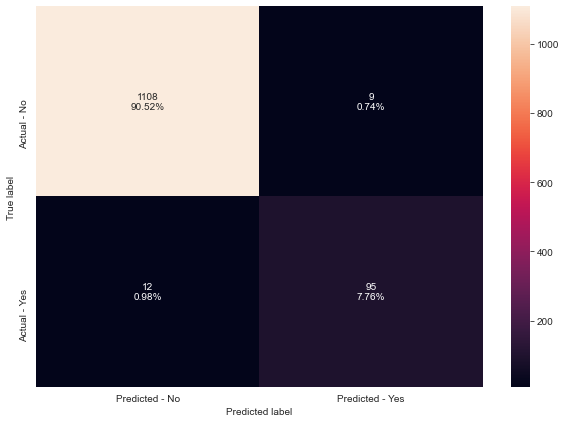

In [156]:
make_confusion_matrix(model,y_test)

In [157]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [158]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8878504672897196


## Visualisation of the Decision

In [167]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


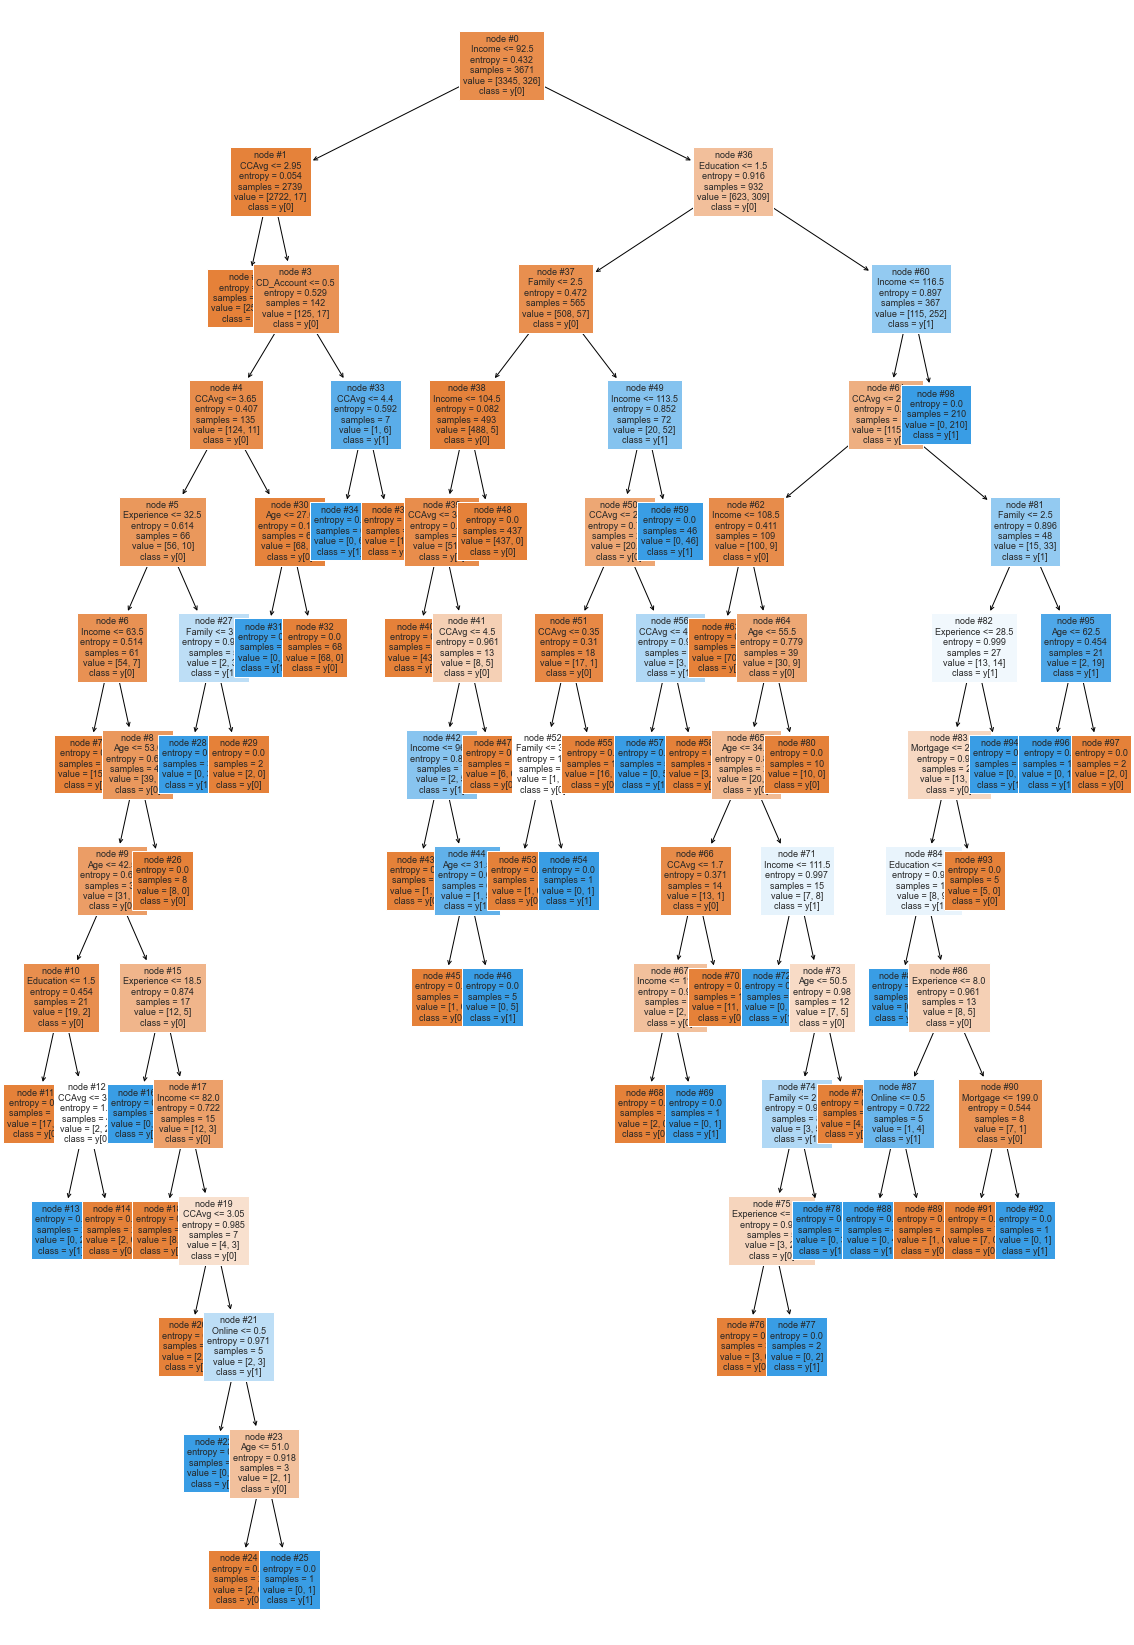

In [168]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [169]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2597.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.65
|   |   |   |   |--- Experience <= 32.50
|   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0
|   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |--- Age <= 53.00
|   |   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [17.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  42.50
|   |   |   |   |   |   |   |   |--- Experience <= 18.50
|  

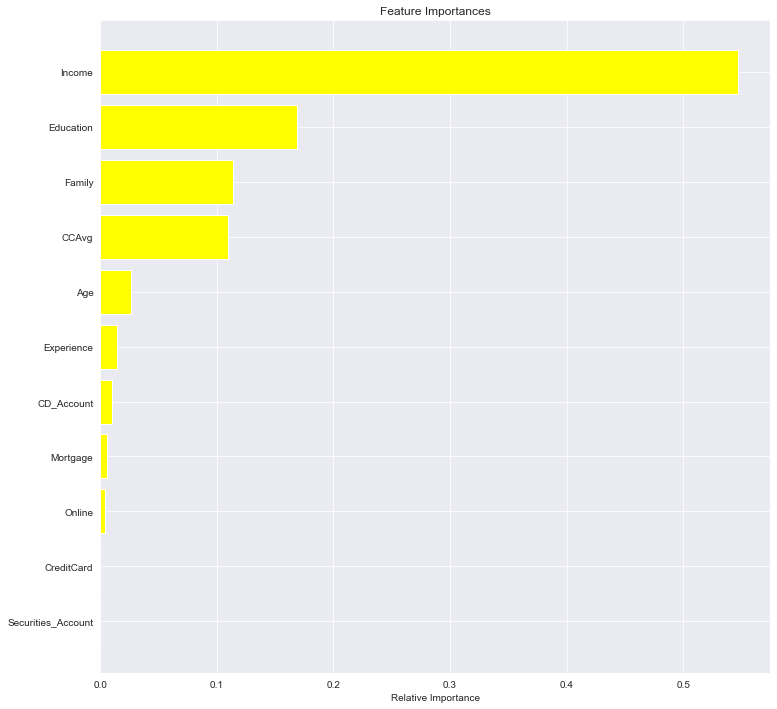

In [170]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Income, Education, Family and CCAvg are the top important features.

## Observation

- We useddecision tree with criterion as entropy can nail it down to higher recall value or with criterion as gini.
- We got a 98% accuracy score while 89% recall value
- Decision tree seems like a really good fit model for this dataframe
- We got a 98% accuracy score while an astonishing 92% recall value but the area under the ROC curve is much smaller in this case
- From the above observation it gives us the reason being the ‘overfitting’ of the data. Which is why we checkend the acccuracy of the test and training data
- This means we have to prune the branches to overcome overfitting

## Pruning

- Let us try and check if we could improve the performance of the model more

In [172]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20,
                       min_impurity_decrease=0.0001, min_samples_leaf=2,
                       random_state=1)

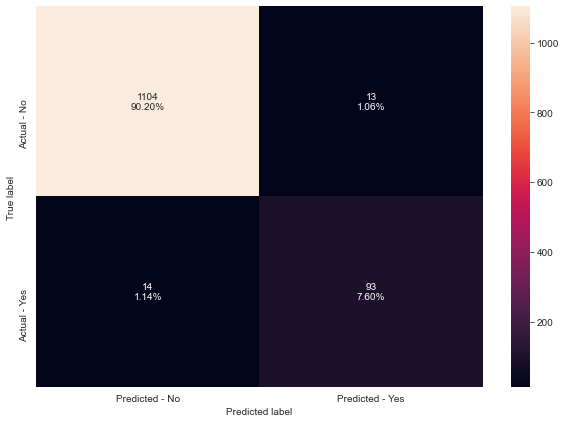

In [173]:
make_confusion_matrix(estimator,y_test)

- The visualisation reveals that the model has performed better because has improved the performace in my opinion.

In [174]:
get_recall_score(estimator)

Recall on training set :  0.9325153374233128
Recall on test set :  0.8691588785046729


In [176]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


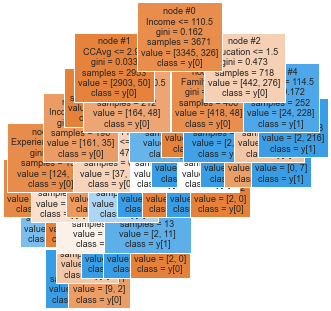

In [177]:
plt.figure(figsize=(5,5))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

- The hyperparameter turning actually helped our model because it displays the leaf nodes

## Cost Complexity Pruning

In [178]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [179]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000242,0.000484
2,0.000245,0.000975
3,0.000248,0.001470
4,0.000251,0.002472
5,0.000253,0.003482
6,0.000272,0.003755
7,0.000360,0.004834
8,0.000363,0.005923
9,0.000367,0.007760


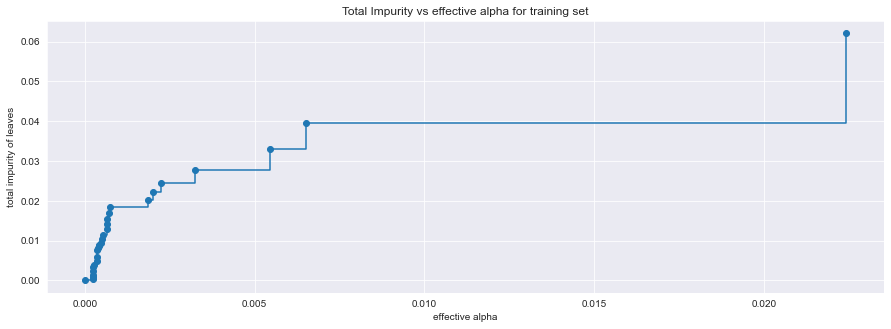

In [180]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We are going to train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [182]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04988460015055911


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

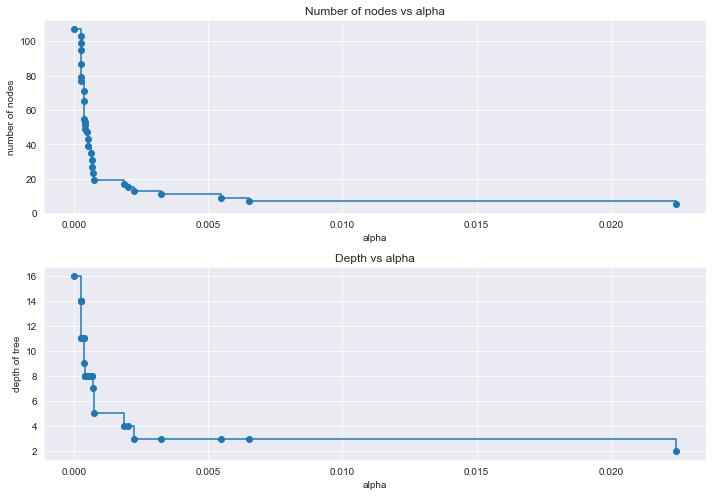

In [183]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [185]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [187]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)


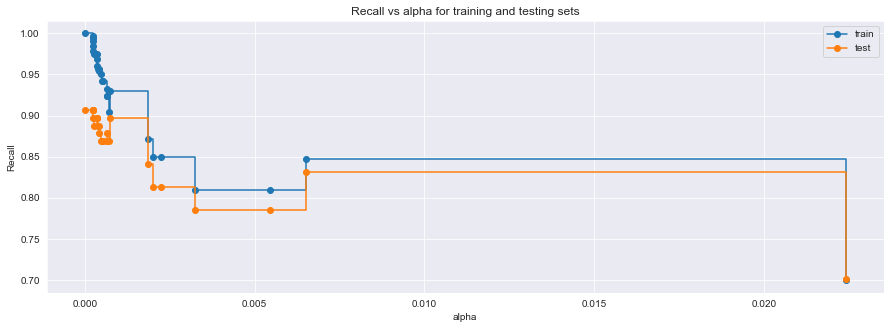

In [188]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [189]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [190]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9065420560747663


- With post-pruning we get the highest recall on both training and test set

### Confusion Matrix

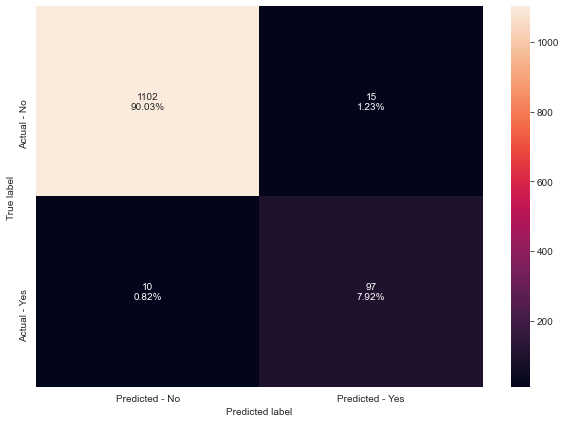

In [191]:
make_confusion_matrix(best_model,y_test)

### Visualizing the Decision Tree

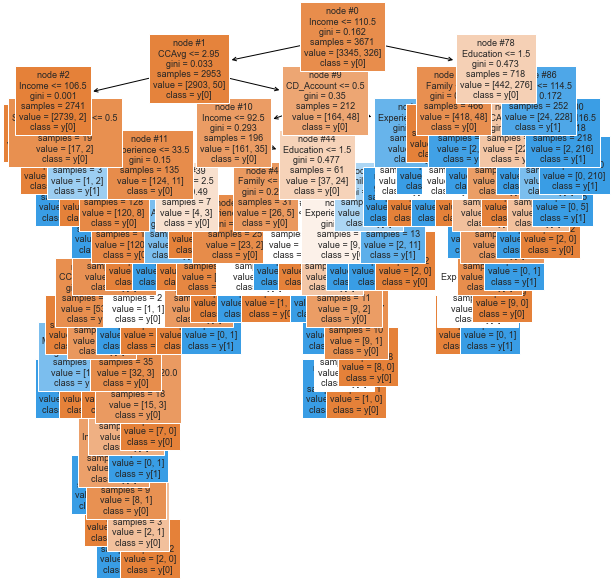

In [192]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [193]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2722.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |--- Securities_Account >  0.50
|   |   |   |   |--- Age <= 38.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  38.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Experience <= 33.50
|   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |   |--- weights: [20.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CC

In [194]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.375416
Income              0.326924
Family              0.150904
CCAvg               0.066067
Age                 0.026870
CD_Account          0.020012
Experience          0.015316
Online              0.007855
Mortgage            0.006108
Securities_Account  0.003780
CreditCard          0.000748


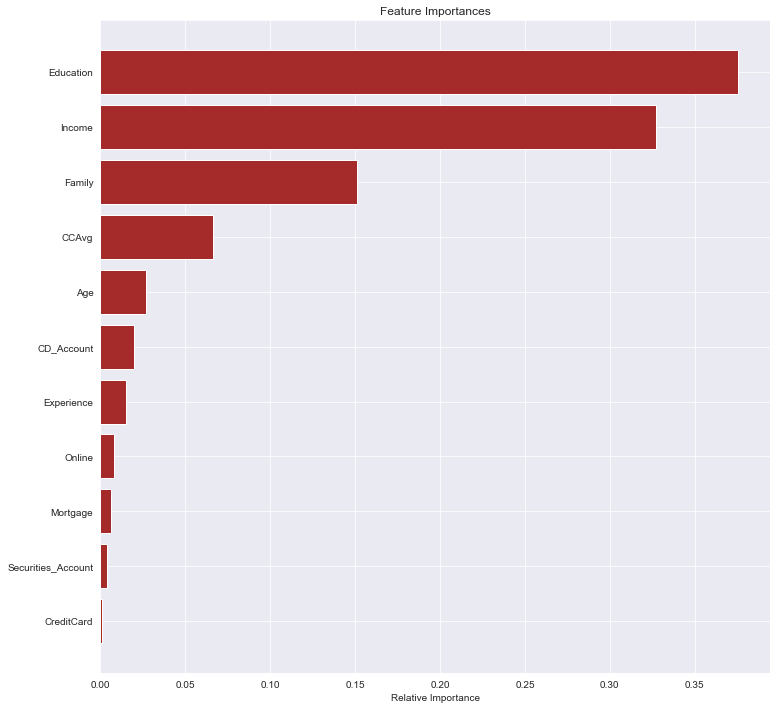

In [196]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Income, Education, Family and CCAvg are still the top important features.
However, there has been a shift in which one has more relative importance and initially Income used to be the most important feature but after the pruning excercise, it reveals that Education has more importance relatively.

Therefore, Monthly Income and Education is the most significant factor that decides personal loan

## Comparing all the decision tree models

In [197]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.90,1,0.93], 'Test_Recall':[0.89,1,0.92]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.90,0.89
1,Decision treee with hyperparameter tuning,1.00,1.00
2,Decision tree with post-pruning,0.93,0.92


* Decision tree with post-pruning is giving the highest recall on the test set, even though we got recall as 1 with hyperparameter tuning but that model wasn't a generalized one

In [218]:
print('\nLogistic Regression Confusion Matrix \: \n', logestic_confusion_matrix_expr)
print('\n Decision Tree Confusion matrix : \n',confusion_matrix)


Logistic Regression Confusion Matrix \: 
 [[1325   16]
 [  60   68]]

 Decision Tree Confusion matrix : 
 [[1093   24]
 [  48   59]]


In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Decision Tree'],
    'Score': [log_reg,acc_dt]})
df = results.sort_values(by='Score', ascending=False)
df = df.set_index('Score')
df

## Final Observation From the Model Building

-  there is a strong relationship between income and number of relationships.
- There is also a correlation between average credit card balance per month and bank relationships.
- The relationship between relationships and value of mortgage is flat when relationships are less than 2, but once it reaches 80K, it spikes and splits along the 55−75K range.
- All groups with any relationship are very active online, though there is a slight correlation with increase in online activity.
- Those with loans, securities accounts, and credit card accounts tend to have strong relationships with the bank, validating what the decision tree showed.
- Those with CD accounts tend to have strong overall relationships with the bank.
- Among the 2 models that we have implemented DecisionTreeClassifier give the best F1 Score and accuracy score with almost accuracy of 98% and F1-Score of 91%
- I woild not really recommend the the use of Logistic Regression to test the acciracy of this model and we can also use better models such as KNN, RandomForest would can provide better insights from the dataset

# Conclusion

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Two classification algorithms were used in this study. From the above graph , it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model